# Hull Tactical Market Prediction - EDA

This notebook explores `train.csv`, covering dataset overview, missingness, distributions, and correlations with target variables.


In [12]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 160)

DATA_PATH = "/Users/shusei/workspace/kaggle/Hull_Tactical-Market-Prediction/train.csv"
assert os.path.exists(DATA_PATH), f"Missing file: {DATA_PATH}"

In [13]:
# Load data
usecols = None  # load all columns
parse_dates = False

df = pd.read_csv(DATA_PATH, usecols=usecols)
print(df.shape)
df.head()

(8990, 98)


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,E1,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E2,E20,E3,E4,E5,E6,E7,E8,E9,I1,I2,I3,I4,I5,I6,I7,I8,I9,M1,M10,M11,M12,M13,M14,M15,M16,M17,M18,M2,M3,M4,M5,M6,M7,M8,M9,P1,P10,P11,P12,P13,P2,P3,P4,P5,P6,P7,P8,P9,S1,S10,S11,S12,S2,S3,S4,S5,S6,S7,S8,S9,V1,V10,V11,V12,V13,V2,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [14]:
# Basic info
print(df.info())
df.describe(include='all').T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

,count,mean,std,min,25%,50%,75%,max
date_id,8990.0,4494.500000,2595.333794,0.000000,2247.250000,4494.500000,6741.750000,8989.000000
D1,8990.0,0.031591,0.174917,0.000000,0.000000,0.000000,0.000000,1.000000
D2,8990.0,0.031591,0.174917,0.000000,0.000000,0.000000,0.000000,1.000000
D3,8990.0,0.047831,0.213420,0.000000,0.000000,0.000000,0.000000,1.000000
D4,8990.0,0.575195,0.494341,0.000000,0.000000,1.000000,1.000000,1.000000
D5,8990.0,0.190656,0.392840,0.000000,0.000000,0.000000,0.000000,1.000000
D6,8990.0,-0.238042,0.425909,-1.000000,0.000000,0.000000,0.000000,0.000000
D7,8990.0,0.045717,0.208883,0.000000,0.000000,0.000000,0.000000,1.000000
D8,8990.0,0.142825,0.349914,0.000000,0.000000,0.000000,0.000000,1.000000
D9,8990.0,0.143159,0.350254,0.000000,0.000000,0.000000,0.000000,1.000000


In [15]:
# Missingness overview
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_ratio = (missing_counts / len(df)).round(4)
miss_df = pd.DataFrame({'missing': missing_counts, 'ratio': missing_ratio})
miss_df[miss_df.missing > 0].head(30)

,missing,ratio
E7,6969,0.7752
V10,6049,0.6729
S3,5733,0.6377
M1,5547,0.6170
M13,5540,0.6162
M14,5540,0.6162
M6,5043,0.5610
V9,4539,0.5049
S12,3537,0.3934
M5,3283,0.3652


In [16]:
# Identify columns by prefix groups (D*, E*, I*, M*, P*, S*, V*, targets)
cols = df.columns.tolist()
prefix_groups = {
    'D': [c for c in cols if c.startswith('D')],
    'E': [c for c in cols if c.startswith('E')],
    'I': [c for c in cols if c.startswith('I')],
    'M': [c for c in cols if c.startswith('M')],
    'P': [c for c in cols if c.startswith('P')],
    'S': [c for c in cols if c.startswith('S')],
    'V': [c for c in cols if c.startswith('V')],
}

id_cols = [c for c in cols if c.endswith('_id') or c == 'date_id']
target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']

prefix_groups, id_cols, target_cols


({'D': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'],
  'E': ['E1',
   'E10',
   'E11',
   'E12',
   'E13',
   'E14',
   'E15',
   'E16',
   'E17',
   'E18',
   'E19',
   'E2',
   'E20',
   'E3',
   'E4',
   'E5',
   'E6',
   'E7',
   'E8',
   'E9'],
  'I': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9'],
  'M': ['M1',
   'M10',
   'M11',
   'M12',
   'M13',
   'M14',
   'M15',
   'M16',
   'M17',
   'M18',
   'M2',
   'M3',
   'M4',
   'M5',
   'M6',
   'M7',
   'M8',
   'M9'],
  'P': ['P1',
   'P10',
   'P11',
   'P12',
   'P13',
   'P2',
   'P3',
   'P4',
   'P5',
   'P6',
   'P7',
   'P8',
   'P9'],
  'S': ['S1',
   'S10',
   'S11',
   'S12',
   'S2',
   'S3',
   'S4',
   'S5',
   'S6',
   'S7',
   'S8',
   'S9'],
  'V': ['V1',
   'V10',
   'V11',
   'V12',
   'V13',
   'V2',
   'V3',
   'V4',
   'V5',
   'V6',
   'V7',
   'V8',
   'V9']},
 ['date_id'],
 ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns'])

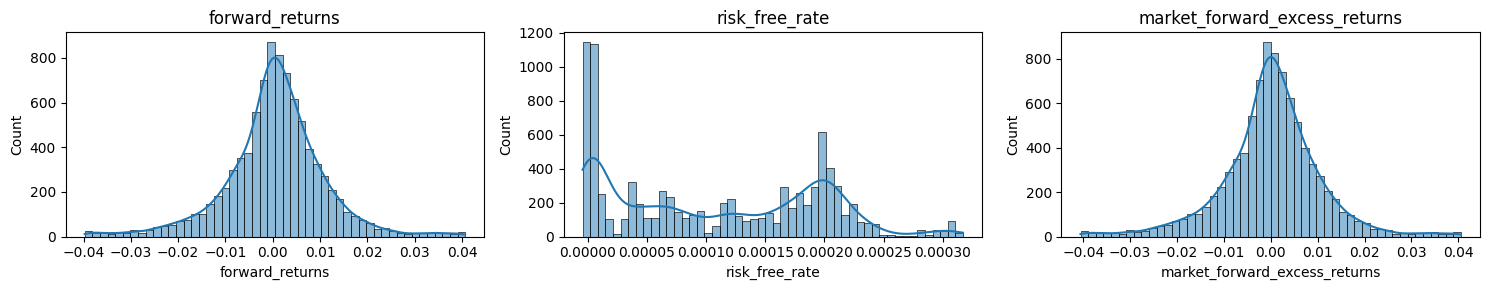

,count,mean,std,min,25%,50%,75%,max
forward_returns,8990.0,0.000469,0.010551,-0.039754,-0.004324,0.000659,0.005900,0.040661
risk_free_rate,8990.0,0.000107,0.000088,-0.000004,0.000008,0.000095,0.000193,0.000317
market_forward_excess_returns,8990.0,0.000051,0.010568,-0.040582,-0.004759,0.000252,0.005479,0.040551


In [17]:
# Target variable summary
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, col in enumerate(target_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=50)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

df[target_cols].describe().T


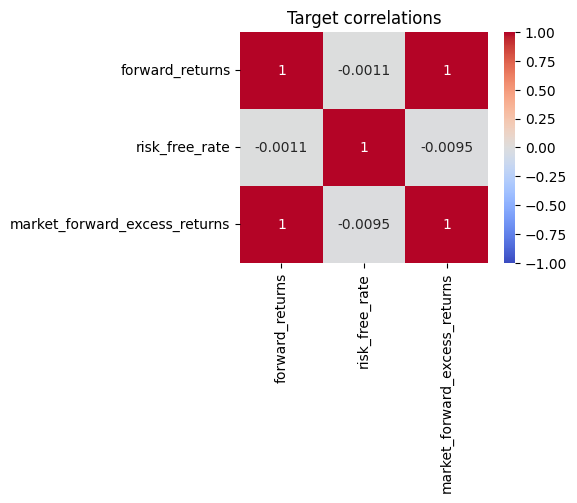

,forward_returns,risk_free_rate,market_forward_excess_returns
forward_returns,1.000000,-0.001126,0.999957
risk_free_rate,-0.001126,1.000000,-0.009526
market_forward_excess_returns,0.999957,-0.009526,1.000000


In [18]:
# Correlations among targets
corr_targets = df[target_cols].corr()
plt.figure(figsize=(4,3))
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Target correlations')
plt.show()

corr_targets


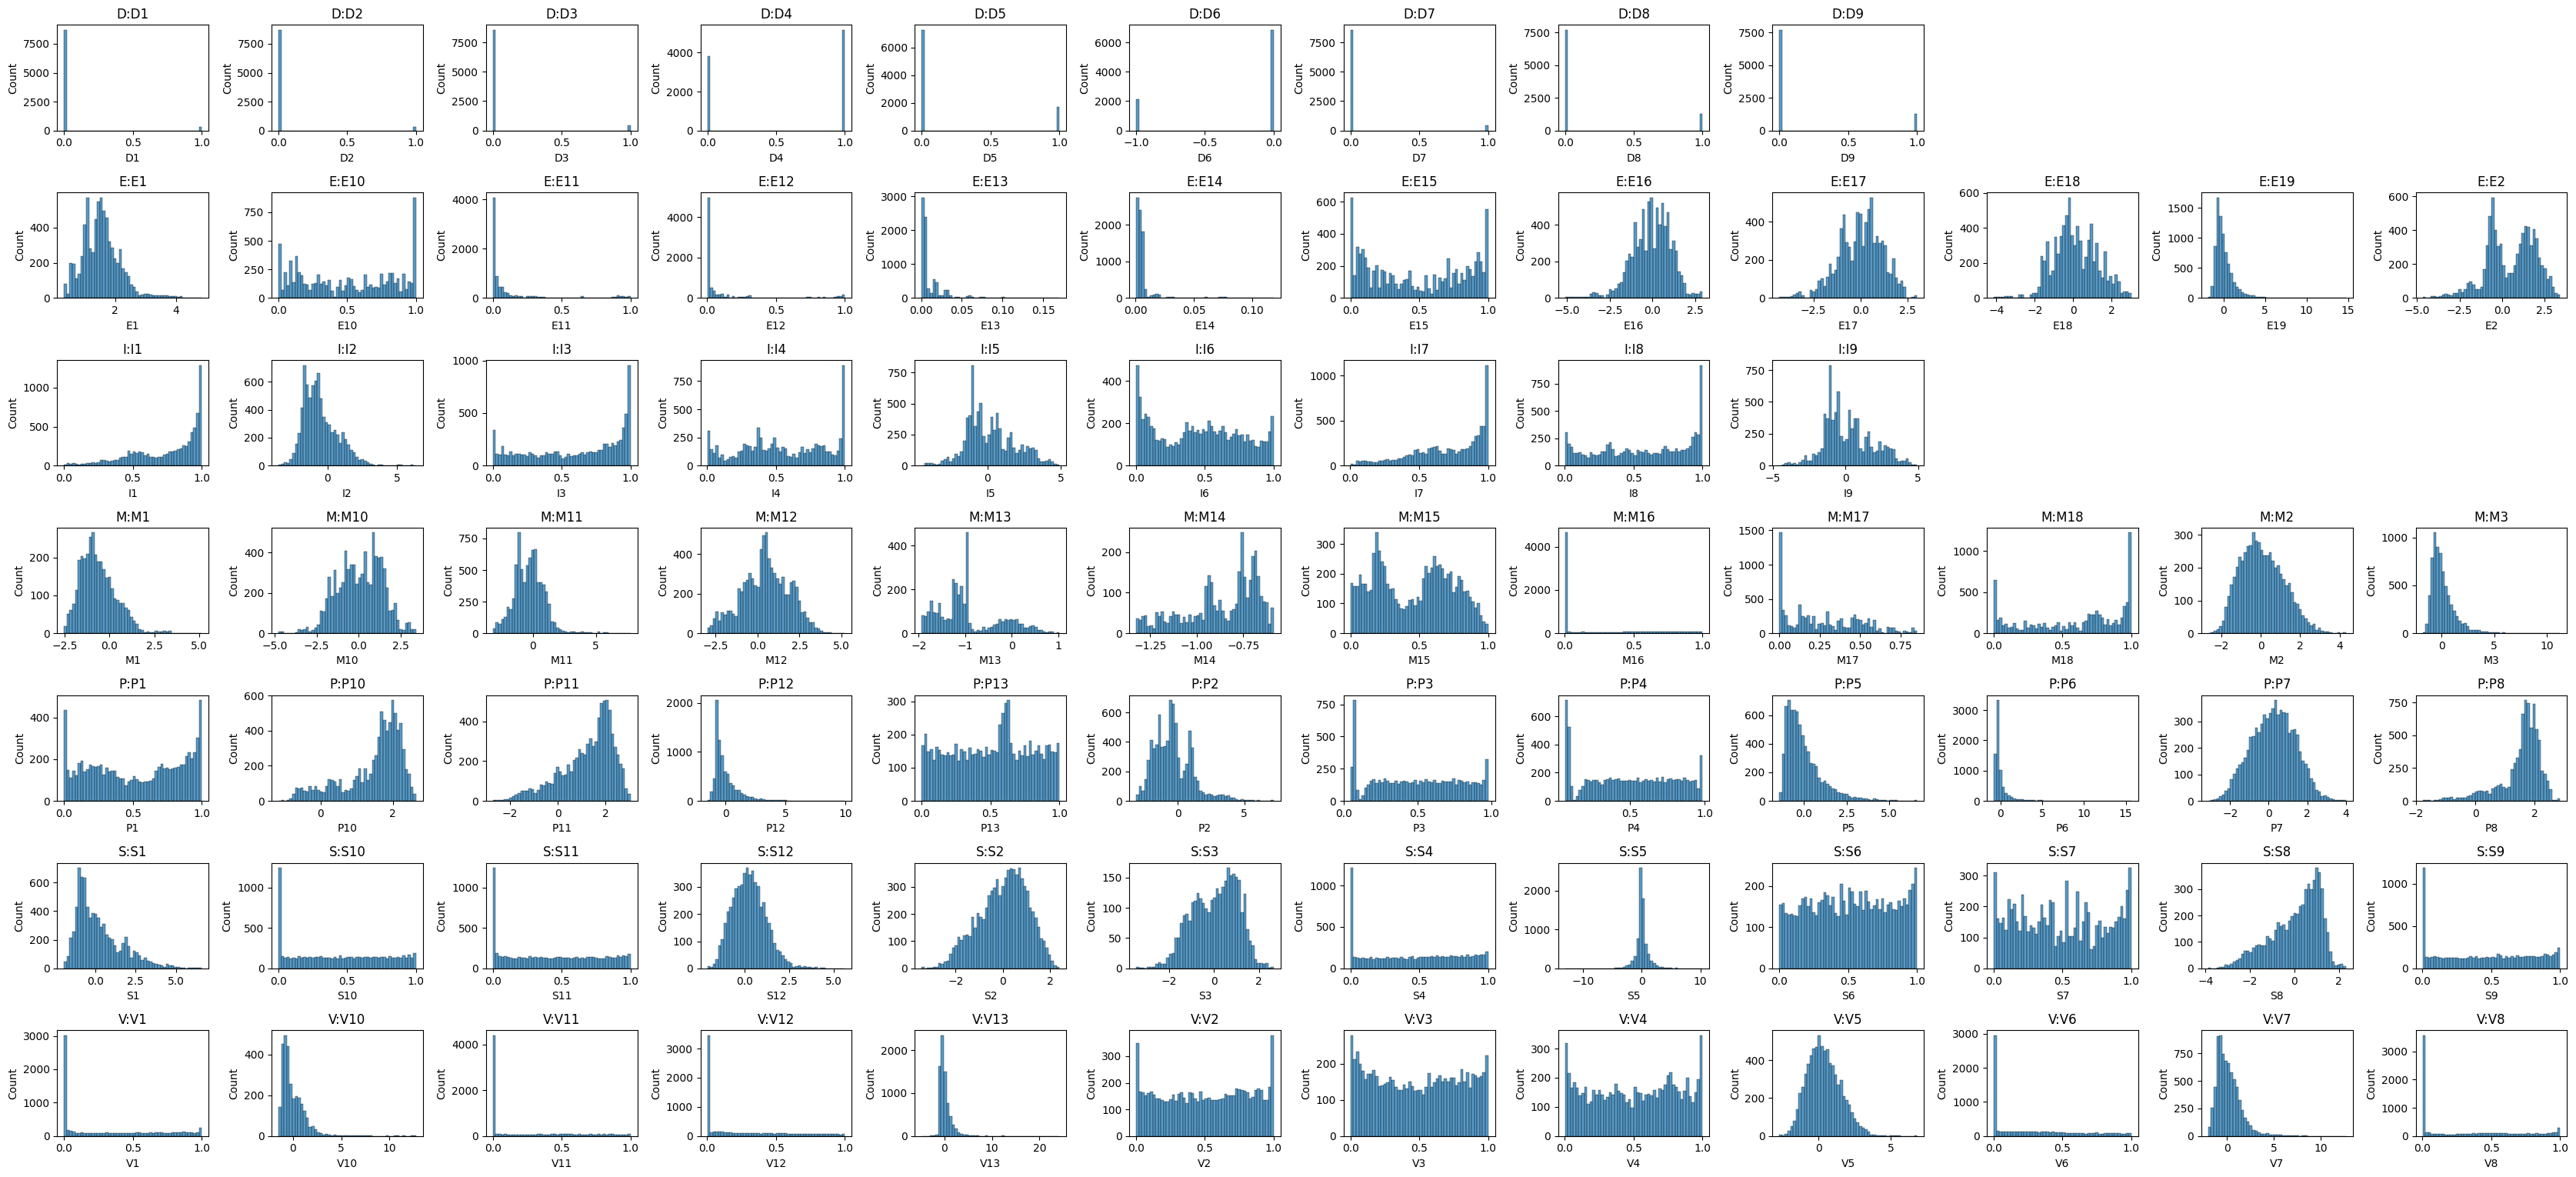

In [19]:
# Distribution overview by prefix groups (sample top 12 cols per group)
num_cols_to_plot = 12
fig, axes = plt.subplots(len(prefix_groups), num_cols_to_plot, figsize=(2.8*num_cols_to_plot, 2.2*len(prefix_groups)), squeeze=False)
for r, (grp, grp_cols) in enumerate(prefix_groups.items()):
    sample_cols = grp_cols[:num_cols_to_plot]
    for c, col in enumerate(sample_cols):
        ax = axes[r][c]
        sns.histplot(df[col].dropna(), bins=50, ax=ax)
        ax.set_title(f"{grp}:{col}")
    # hide extra axes if fewer than num_cols_to_plot
    for c in range(len(sample_cols), num_cols_to_plot):
        axes[r][c].axis('off')
plt.tight_layout()
plt.show()


In [20]:
# Simple correlations: top features correlated with targets (absolute)
# Use numeric-only to avoid issues
numeric_df = df.select_dtypes(include=[np.number])

corr_with_targets = {}
for t in target_cols:
    corr_series = numeric_df.corr()[t].drop(labels=target_cols, errors='ignore').dropna().abs().sort_values(ascending=False)
    corr_with_targets[t] = corr_series.head(20)

pd.DataFrame(corr_with_targets).head(20)


,forward_returns,risk_free_rate,market_forward_excess_returns
D1,0.034180,NaN,0.034185
D2,0.034180,NaN,0.034185
D8,0.024739,NaN,0.024687
E11,0.030796,NaN,0.032040
E12,0.029557,NaN,0.030843
E19,0.024513,NaN,0.023229
E20,NaN,0.370282,NaN
E3,NaN,0.331514,NaN
E6,NaN,0.381393,NaN
E7,0.032192,NaN,0.032476


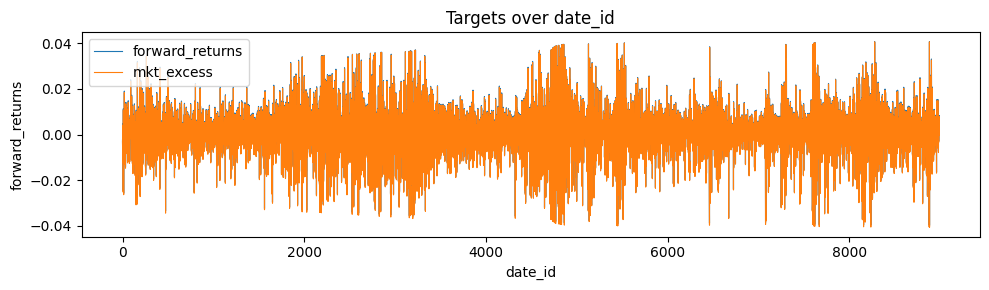

In [21]:
# Time-like inspection using date_id if present
if 'date_id' in df.columns:
    plt.figure(figsize=(10,3))
    sns.lineplot(data=df, x='date_id', y='forward_returns', label='forward_returns', linewidth=0.8)
    sns.lineplot(data=df, x='date_id', y='market_forward_excess_returns', label='mkt_excess', linewidth=0.8)
    plt.title('Targets over date_id')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('date_id not present')


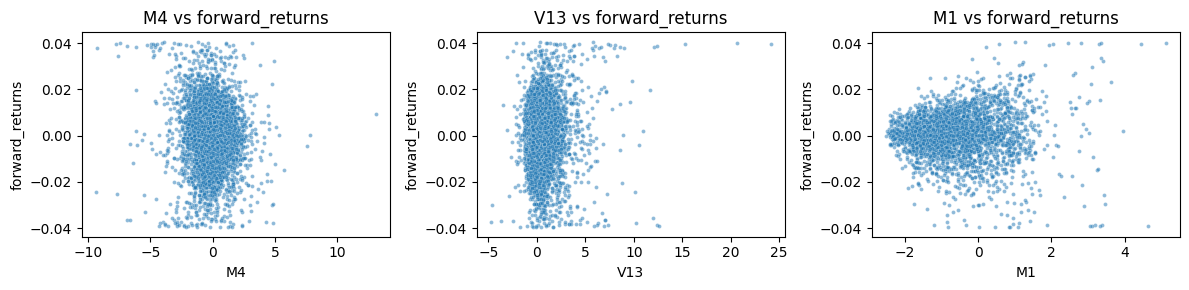

['M4', 'V13', 'M1']

In [22]:
# Scatter relationship: top-3 features by correlation for forward_returns
corr_series = numeric_df.corr()['forward_returns'].drop(labels=target_cols, errors='ignore').dropna().abs().sort_values(ascending=False)
top3 = corr_series.head(3).index.tolist()
fig, axes = plt.subplots(1, 3, figsize=(12,3))
for i, col in enumerate(top3):
    sns.scatterplot(data=df, x=col, y='forward_returns', s=8, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{col} vs forward_returns")
plt.tight_layout()
plt.show()

top3

## Notes
- Many feature columns with prefixes D/E/I/M/P/S/V appear binary/discrete; distributions reflect sparsity.
- Targets look roughly centered near zero with fat tails.
- We will list top correlated features with each target; correlations are expected to be small given market data.


## Auto-generated Findings
This section programmatically summarizes key EDA signals: size, missingness, target stats, top correlations, and simple volatility.


In [23]:
# Auto-generated findings summary
from textwrap import dedent

summary = []

# Basic
n_rows, n_cols = df.shape
summary.append(f"Rows: {n_rows:,}, Columns: {n_cols}")

# Missingness
missing_counts = df.isna().sum()
num_missing_cols = (missing_counts > 0).sum()
max_missing_col = missing_counts.idxmax()
max_missing_ratio = missing_counts.max() / len(df)
summary.append(f"Columns with missing values: {num_missing_cols}")
summary.append(f"Most missing: {max_missing_col} ({max_missing_ratio:.1%})")

# Targets
target_desc = df[target_cols].describe().T
for t in target_cols:
    if t in df:
        mean = target_desc.loc[t, 'mean']
        std = target_desc.loc[t, 'std']
        p1 = df[t].quantile(0.01)
        p99 = df[t].quantile(0.99)
        summary.append(f"{t}: mean={mean:.5f}, std={std:.5f}, 1%={p1:.5f}, 99%={p99:.5f}")

# Correlations
numeric_df = df.select_dtypes(include=[np.number])
corrs = {}
for t in target_cols:
    if t in numeric_df:
        s = numeric_df.corr()[t].drop(labels=target_cols, errors='ignore').dropna()
        top = s.abs().sort_values(ascending=False).head(5)
        pairs = ", ".join([f"{k} ({v:.3f})" for k, v in top.items()])
        corrs[t] = pairs
        summary.append(f"Top features vs {t}: {pairs}")

# Volatility regime (rolling std of forward_returns)
if 'forward_returns' in df:
    tmp = df[['date_id','forward_returns']].dropna()
    if 'date_id' in tmp and len(tmp) > 50:
        tmp = tmp.sort_values('date_id')
        tmp['roll_std_50'] = tmp['forward_returns'].rolling(50).std()
        high_vol = tmp['roll_std_50'].quantile(0.9)
        low_vol = tmp['roll_std_50'].quantile(0.1)
        summary.append(f"Rolling 50-day std: 10th={low_vol:.5f}, 90th={high_vol:.5f}")

report = "\n".join([f"- {line}" for line in summary])
print(report)


- Rows: 8,990, Columns: 98
- Columns with missing values: 85
- Most missing: E7 (77.5%)
- forward_returns: mean=0.00047, std=0.01055, 1%=-0.03167, 99%=0.03151
- risk_free_rate: mean=0.00011, std=0.00009, 1%=0.00000, 99%=0.00031
- market_forward_excess_returns: mean=0.00005, std=0.01057, 1%=-0.03207, 99%=0.03115
- Top features vs forward_returns: M4 (0.067), V13 (0.063), M1 (0.045), S5 (0.041), S2 (0.037)
- Top features vs risk_free_rate: V8 (0.661), M14 (0.588), V1 (0.572), V12 (0.520), date_id (0.519)
- Top features vs market_forward_excess_returns: M4 (0.066), V13 (0.062), M1 (0.046), S5 (0.040), S2 (0.038)
- Rolling 50-day std: 10th=0.00540, 90th=0.01527
